                                                  # Reinforcement Learning                  

Reinforcement Learning (RL) is a branch of machine learning that focuses on how agents can learn to make decisions through trial and error to maximize cumulative rewards. RL allows machines to learn by interacting with an environment and receiving feedback based on their actions. This feedback comes in the form of rewards or penalties.

Reinforcement Learning revolves around the idea that an agent (the learner or decision-maker) interacts with an environment to achieve a goal. The agent performs actions and receives feedback to optimize its decision-making over time.

* Agent: The decision-maker that performs actions.
* Environment: The world or system in which the agent operates.
* State: The situation or condition the agent is currently in.
* Action: The possible moves or decisions the agent can make.
* Reward: The feedback or result from the environment based on the agent’s action.

# Core Components
Let's see the core components of Reinforcement Learning

### 1. Policy

* Defines the agent’s behavior i.e maps states for actions.
* Can be simple rules or complex computations.
* Example: An autonomous car maps pedestrian detection to make necessary stops.
### 2. Reward Signal

* Represents the goal of the RL problem.
* Guides the agent by providing feedback (positive/negative rewards).
* Example: For self-driving cars rewards can be fewer collisions, shorter travel time, lane discipline.
### 3. Value Function

* Evaluates long-term benefits, not just immediate rewards.
* Measures desirability of a state considering future outcomes.
* Example: A vehicle may avoid reckless maneuvers (short-term gain) to maximize overall safety and efficiency.
### 4. Model

* Simulates the environment to predict outcomes of actions.
* Enables planning and foresight.
* Example: Predicting other vehicles’ movements to plan safer routes.

# Working of Reinforcement Learning
The agent interacts iteratively with its environment in a feedback loop:

* The agent observes the current state of the environment.
* It chooses and performs an action based on its policy.
* The environment responds by transitioning to a new state and providing a reward (or penalty).
* The agent updates its knowledge (policy, value function) based on the reward received and the new state.
* This cycle repeats with the agent balancing exploration (trying new actions) and exploitation (using known good actions) to maximize the cumulative reward over time.

This process is mathematically framed as a Markov Decision Process (MDP) where future states depend only on the current state and action, not on the prior sequence of events.

# Implementing Reinforcement Learning

## Step 1: Import libraries and Define Maze, Start and Goa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

maze = np.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
])

start = (0, 0)
goal = (9, 9)

The maze is represented as a 2D NumPy array.
* Zero values are safe paths; ones are obstacles the agent must avoid.
* Start and goal define the positions where the agent begins and where it aims to reach.

## Step 2: Define RL Parameters and Initialize Q-Table

* num_episodes: Number of times the agent will attempt to navigate the maze.
* alpha: Learning rate that controls how much new information overrides old information.
* gamma: Discount factor giving more weight to immediate rewards.
* epsilon: Probability of exploration vs exploitation; starts higher to explore more.
* Rewards are set to penalize hitting obstacles, reward reaching the goal and slightly penalize each step to find shortest paths.
* actions define possible moves: left, right, up, down.
* Q is the Q-Table initialized to zero; it stores expected rewards for each state-action pair.

In [3]:
num_episodes = 5000
alpha = 0.1
gamma = 0.9
epsilon = 0.5

reward_fire = -10
reward_goal = 50
reward_step = -1

actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

Q = np.zeros(maze.shape + (len(actions),))

## Step 3: Helper Function for Maze Validity and Action Selection

* is_valid ensures the agent can only move inside the maze and avoids obstacles.
* choose_action implements exploration (random action) vs exploitation (best learned action) strategy.

In [4]:
def is_valid(pos):
    r, c = pos
    if r < 0 or r >= maze.shape[0]:
        return False
    if c < 0 or c >= maze.shape[1]:
        return False
    if maze[r, c] == 1:
        return False
    return True


def choose_action(state):
    if np.random.random() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

## Step 4: Train the Agent with Q-Learning Algorithm

We will train the agent by running multiple episodes for the agent to learn. During each episode, the agent selects actions and updates its Q-Table using the Q-learning update rule:

* Q(s,a)=Q(s,a)+α[r+γmax 
a 
′
 Q(s 
′
 ,a 
′
 )−Q(s,a)]

#### Where:

* s: current state (agent’s position in the maze)
* a: action taken at state s (e.g., move left, right, up, down)
* r: reward received after taking action a
* s′: next state after performing action a
* α(alpha): learning rate controlling how much new information overrides old
* γ(gamma) discount factor for future rewards

In [5]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = start
    total_rewards = 0
    done = False

    while not done:
        action_index = choose_action(state)
        action = actions[action_index]

        next_state = (state[0] + action[0], state[1] + action[1])

        if not is_valid(next_state):
            reward = reward_fire
            done = True
        elif next_state == goal:
            reward = reward_goal
            done = True
        else:
            reward = reward_step

        old_value = Q[state][action_index]
        next_max = np.max(Q[next_state]) if is_valid(next_state) else 0

        Q[state][action_index] = old_value + alpha * \
            (reward + gamma * next_max - old_value)

        state = next_state
        total_rewards += reward

    global epsilon
    epsilon = max(0.01, epsilon * 0.995)
    rewards_all_episodes.append(total_rewards)

## Step 5: Extract the Optimal Path after Training

In [6]:
def get_optimal_path(Q, start, goal, actions, maze, max_steps=200):
    path = [start]
    state = start
    visited = set()

    for _ in range(max_steps):
        if state == goal:
            break
        visited.add(state)

        best_action = None
        best_value = -float('inf')

        for idx, move in enumerate(actions):
            next_state = (state[0] + move[0], state[1] + move[1])

            if (0 <= next_state[0] < maze.shape[0] and
                0 <= next_state[1] < maze.shape[1] and
                maze[next_state] == 0 and
                    next_state not in visited):

                if Q[state][idx] > best_value:
                    best_value = Q[state][idx]
                    best_action = idx

        if best_action is None:
            break

        move = actions[best_action]
        state = (state[0] + move[0], state[1] + move[1])
        path.append(state)

    return path


optimal_path = get_optimal_path(Q, start, goal, actions, maze)

## Step 6: Visualize the Maze, Robot Path, Start and Goal

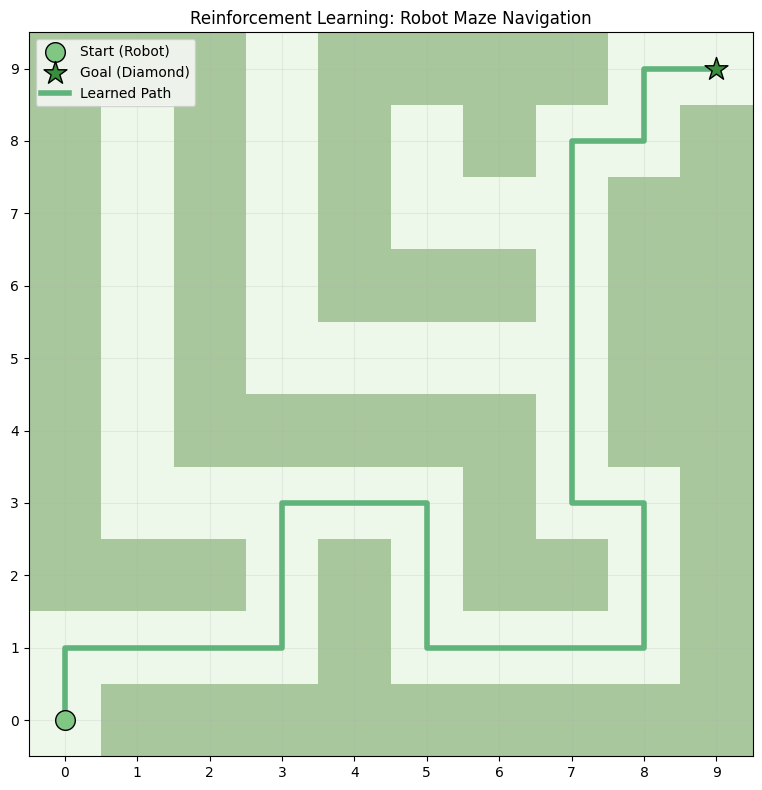

In [7]:
def plot_maze_with_path(path):
    cmap = ListedColormap(['#eef8ea', '#a8c79c'])

    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap=cmap)

    plt.scatter(start[1], start[0], marker='o', color='#81c784', edgecolors='black',
                s=200, label='Start (Robot)', zorder=5)
    plt.scatter(goal[1], goal[0], marker='*', color='#388e3c', edgecolors='black',
                s=300, label='Goal (Diamond)', zorder=5)

    rows, cols = zip(*path)
    plt.plot(cols, rows, color='#60b37a', linewidth=4,
             label='Learned Path', zorder=4)

    plt.title('Reinforcement Learning: Robot Maze Navigation')
    plt.gca().invert_yaxis()
    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_maze_with_path(optimal_path)

## Step 7: Plot Rewards per Training

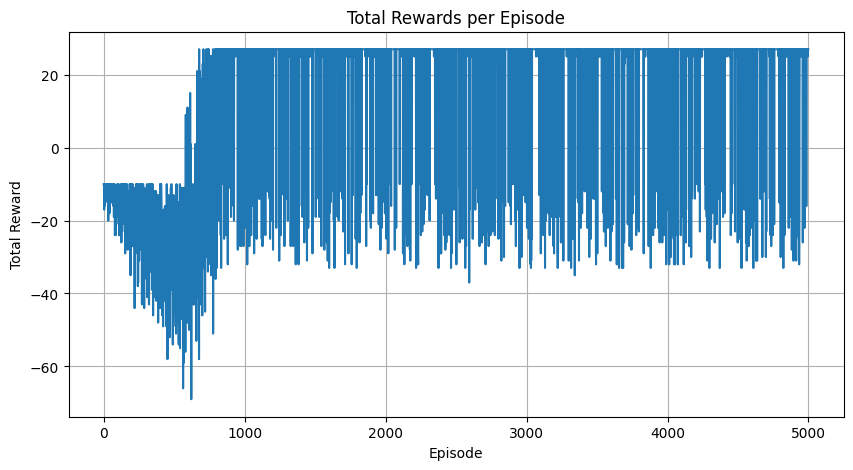

In [8]:
def plot_rewards(rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards)
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.show()


plot_rewards(rewards_all_episodes)

## Types of Reinforcements
### 1. Positive Reinforcement: Positive Reinforcement is defined as when an event, occurs due to a particular behavior, increases the strength and the frequency of the behavior. In other words, it has a positive effect on behavior. 

* Advantages: Maximizes performance, helps sustain change over time.
* Disadvantages: Overuse can lead to excess states that may reduce effectiveness.

### 2. Negative Reinforcement: Negative Reinforcement is defined as strengthening of behavior because a negative condition is stopped or avoided. 

* Advantages: Increases behavior frequency, ensures a minimum performance standard.
* Disadvantages: It may only encourage just enough action to avoid penalties.

## Online vs. Offline Learning

Reinforcement Learning can be categorized based on how and when the learning agent acquires data from its environment, dividing the methods into online RL and offline RL (also known as batch RL).

* In online RL, the agent learns by actively interacting with the environment in real-time. It collects fresh data during training by executing actions and observing immediate feedback as it learns.
* Offline RL trains the agent exclusively on a pre-collected static dataset of interactions generated by other agents, human demonstrations or historical logs. The agent does not interact with the environment during learning.

# Markov Decision Process

Markov Decision Process (MDP) is a way to describe how a decision-making agent like a robot or game character moves through different situations while trying to achieve a goal. MDPs rely on variables such as the environment, agent’s actions and rewards to decide the system’s next optimal action. It helps us answer questions like:

* What actions should the agent take?
* What happens after an action?
* Is the result good or bad?

In artificial intelligence Markov Decision Processes (MDPs) are used to model situations where decisions are made one after another and the results of actions are uncertain. They help in designing smart machines or agents that need to work in environments where each action might led to different outcomes.

Key Components of an MDP

1. States (S): A state is a situation or condition the agent can be in. For example, A position on a grid like being at cell (1,1).

2. Actions (A): An action is something the agent can do. For example, Move UP, DOWN, LEFT or RIGHT. Each state can have one or more possible actions.

3. Transition Model (T): The model tells us what happens when an action is taken in a state. It’s like asking: “If I move RIGHT from here, where will I land?” Sometimes the outcome isn’t always the same that’s uncertainty. For example:

* 80% chance of moving in the intended direction
* 10% chance of slipping to the left
* 10% chance of slipping to the right
This randomness is called a stochastic transition.

4. Reward (R): A reward is a number given to the agent after it takes an action. If the reward is positive, it means the result of the action was good. If the reward is negative it means the outcome was bad or there was a penalty help the agent learn what’s good or bad. Examples:

* +1 for reaching the goal
* -1 for stepping into fire
* -0.1 for each step to encourage fewer moves
5. Policy (π): A policy is the agent’s plan. It tells the agent: “If you are in this state, take this action.” The goal is to find the best policy that helps the agent earn the highest total reward over time.

Applications
Markov Decision Processes are useful in many real-life situations where decisions must be made step-by-step under uncertainty. Here are some applications:

* Robots and Machines: Robots use MDPs to decide how to move safely and efficiently in places like factories or warehouses and avoid obstacles.
* Game Strategy: In board games or video games MDPs help characters to choose the best moves to win or complete tasks even when outcomes are not certain.
* Healthcare: Doctors can use it to plan treatments for patients, choosing actions that improve health while considering uncertain effects.
* Traffic and Navigation: Self-driving cars or delivery vehicles use it to find safe routes and avoid accidents on unpredictable roads.
* Inventory Management: Stores and warehouses use MDPs to decide when to order more stock so they don’t run out or keep too much even when demand changes.

# Bellman Equation  

The Bellman Equation is a formula used in reinforcement learning to calculate the value of a state. It says that the value of a state is equal to the reward received now plus the expected value of the next state. This helps an agent make better decisions by considering both immediate and future rewards. It is based on the principle of optimality which means the best value of a state depends on the immediate reward and the value of the next state.

## 1. Bellman Equation for State Value Function

State value function denoted as 
V(s) under a given policy represents the expected cumulative reward when starting from state 
s and following that policy:

V 
π
 (s)=E[R(s,a)+γV 
π
 (s 
′
 )]

Expanding this equation with transition probabilities we get:

V 
π
 (s)=∑ 
a∈A`
​
 π(a∣s)∑ 
s 
′
 ∈S
​
 P(s 
′
 ∣s,a)[R(s,a)+γV 
π
 (s 
′
 )]

where:

* V 
π
 (s): Value function of state s under policy.
* P(s 
′
 ∣s,a): Transition probability from state 
s to state 
s 
′
  when taking action 
a.
* R(s,a): Reward obtained after taking action 
a in state 
s.
* γ: Discount factor controlling the importance of future rewards.
* π(a∣s): Probability of taking action 
a in state 
s under policy .

## 2. Bellman Equation for Action Value Function (Q-function)

Q-function (
Q(s,a)) represents the expected return for taking action 
a in state s and following the policy afterward:

Q 
π
 (s,a)=E[R(s,a)+γV 
π
 (s 
′
 )]

Expanding it using transition probabilities:

Q 
π
 (s,a)=∑ 
s 
′
 ∈S
​
 P(s 
′
 ∣s,a)[R(s,a)+γ∑ 
a 
′
 
​
 π(a 
′
 ∣s 
′
 )Q 
π
 (s 
′
 ,a 
′
 )]

This equation helps compute the expected future rewards based on both current action 
a and subsequent policy actions.

### Bellman Optimality Equations
For an optimal policy 
π 
∗
 , the Bellman equation becomes:

1. Optimal State Value Function

V 
∗
 (s)=max 
a

 ∑ 
s 
′
​
 P(s 
′
 ∣s,a)[R(s,a)+γV 
∗
 (s 
′
 )]

2. Optimal Action Value Function (Q-Learning)

Q 
∗
 (s,a)=∑ 
s 
′
​
 P(s 
′
 ∣s,a)[R(s,a)+γmax 
a 
′
​
 Q 
∗
 (s 
′
 ,a 
′
 )]

These equations form the foundation for Dynamic Programming, Temporal Difference (TD) Learning and Q-Learning.

Solving MDPs with Bellman Equations
Markov Decision Process can be solved using Dynamic Programming (DP) methods that rely on Bellman Equations:

* Value Iteration: Uses Bellman Optimality Equation to iteratively update value functions until convergence.
* Policy Iteration: Alternates between policy evaluation (solving Bellman Expectation Equation) and policy improvement (updating policy based on new value function).
* Q-Learning: Uses the Bellman Optimality Equation for Q-values to learn optimal policies.